In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from amstools import *

In [3]:
from tensorpotential.calculator import grace_fm, TPCalculator

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


2026-02-27 11:42:33.193782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772188953.205014  683236 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772188953.208418  683236 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772188953.217525  683236 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772188953.217533  683236 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772188953.217534  683236 computation_placer.cc:177] computation placer alr

In [4]:
calc=TPCalculator("seed/1/final_model/")

2026-02-27 11:42:40.129395: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
from amstools.thermodynamics import run_convex_hull_calculation, plot_convex_hull

In [6]:
from amstools.sources import fetch_structures, fetch_mp_reference_df

In [7]:
from ase.build import bulk

In [8]:
import os

In [9]:
cache_dir=os.path.abspath(os.getcwd()+"/../0-data/AlLi_Materials_Project")
cache_dir

'/pc2/users/u/usrtr200/mlpfits-2026-grace/grace-tutorial-2026-v2/1-AlLi-GRACE-2LAYER/0-data/AlLi_Materials_Project'

In [10]:
ref_df=fetch_mp_reference_df(['Al','Li'], 
                             # mp_api_key='XXXXX',  ## get from https://next-gen.materialsproject.org/api                         
                             max_atoms=32,
                             cache_dir=cache_dir)

In [11]:
ref_df

,name,ase_atoms,e_per_atom,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.000000,0.000000
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.032078,0.032078
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",NaN,0.010481,0.010481
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.001672,0.001672
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.009651,0.009651
5,Li__mp-976411,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.005889,0.005889
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.618009551014942), np...",NaN,0.000000,0.000000
7,Li__mp-1103107,"(Atom('Li', [np.float64(1.379696372079909), np...",NaN,0.055379,0.055379
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",NaN,0.015671,0.015671
9,Li__mp-10173,"(Atom('Li', [np.float64(-1.1807313597921131e-0...",NaN,0.005988,0.005988


In [12]:
struct_dict=fetch_structures(['Al','Li'], 
                             #mp_api_key='XXX', 
                             max_atoms=32,
                             cache_dir=cache_dir)

In [13]:
pipeline_dict={}

In [14]:
df, pipeline_dict=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc, pipeline_dict=pipeline_dict)

2026-02-27 11:42:45,582 - root - INFO - Processing structure 'Al__mp-134'
2026-02-27 11:42:45,583 - root - INFO - =======================
2026-02-27 11:42:45,583 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)):   0%|          | 0/1 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1772188966.041886  683236 service.cc:152] XLA service 0x17519e20 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772188966.041959  683236 service.cc:160]   StreamExecutor device (0): Host, Default Version
2026-02-27 11:42:46.424058: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1772188968.436211  683236 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Processing: optimized_s

Structure dataset: multiple unique compositions found, trying to construct convex hull


In [15]:
df

,name,ase_atoms,energy,energy_per_atom,equilibrium_volume,equilibrium_bulk_modulus,comp_dict,NUMBER_OF_ATOMS,comp_tuple,n_Al,c_Al,n_Li,c_Li,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-134,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-3.751998,-3.751998,16.551484,82.765428,{'Al': 1},1,"((Al, 1.0),)",1,1.000000,0,0.000000,0.000000,0.000000
1,Al__mp-2647008,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-7.444765,-3.722382,33.067842,77.238593,{'Al': 2},2,"((Al, 1.0),)",2,1.000000,0,0.000000,0.029616,0.029616
2,Al__mp-1183144,"(Atom('Al', [np.float64(0.0), np.float64(0.0),...",-14.952414,-3.738103,66.031755,80.553140,{'Al': 4},4,"((Al, 1.0),)",4,1.000000,0,0.000000,0.013895,0.013895
3,Li__mp-51,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-1.914878,-1.914878,20.083998,17.465209,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.000864,0.000864
4,Li__mp-135,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-1.915742,-1.915742,20.074136,14.783000,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.000000,0.000000
5,Li__mp-976411,"(Atom('Li', [np.float64(-1.3030619847924349e-2...",-7.655744,-1.913936,79.967829,17.175074,{'Li': 4},4,"((Li, 1.0),)",0,0.000000,4,1.000000,0.001806,0.001806
6,Li__mp-1018134,"(Atom('Li', [np.float64(4.57194685787411), np....",-5.740908,-1.913636,59.902826,17.381880,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.002106,0.002106
7,Li__mp-1103107,"(Atom('Li', [np.float64(1.4327195015181442), n...",-22.548088,-1.879007,245.040716,13.933800,{'Li': 12},12,"((Li, 1.0),)",0,0.000000,12,1.000000,0.036735,0.036735
8,Li__mp-1063005,"(Atom('Li', [np.float64(0.0), np.float64(0.0),...",-5.706431,-1.902144,59.474930,17.408332,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.013599,0.013599
9,Li__mp-10173,"(Atom('Li', [np.float64(-1.0435840177432792e-0...",-3.826530,-1.913265,39.753987,17.195063,{'Li': 2},2,"((Li, 1.0),)",0,0.000000,2,1.000000,0.002478,0.002478


In [16]:
calc_fm=grace_fm("GRACE-2L-OMAT-large-ft-E")

Using cached GRACE model from /pc2/users/u/usrtr200/.cache/grace/GRACE-2L-OMAT-large-ft-E
Model license: Academic Software License


In [17]:
pipeline_dict_fm = {}

In [18]:
df_fm, pipeline_dict_fm=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_fm, pipeline_dict=pipeline_dict_fm)

2026-02-27 11:43:29,963 - root - INFO - Processing structure 'Al__mp-134'
2026-02-27 11:43:29,964 - root - INFO - =======================
2026-02-27 11:43:29,964 - root - INFO - Step: optimization
Processing: optimized_structure (1 atom(s)): 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]
2026-02-27 11:43:32,314 - root - INFO - Step status: finished
2026-02-27 11:43:32,314 - root - INFO - =======================
2026-02-27 11:43:32,315 - root - INFO - =======================
2026-02-27 11:43:32,315 - root - INFO - Step: murnaghan
Processing: strain_1_1 (1 atom(s)): 100%|██████████| 11/11 [00:01<00:00,  9.95it/s]              
2026-02-27 11:43:33,425 - root - INFO - Job is done
2026-02-27 11:43:33,425 - root - INFO - Step status: finished
2026-02-27 11:43:33,425 - root - INFO - =======================
2026-02-27 11:43:33,426 - root - INFO - Processing structure 'Al__mp-2647008'
2026-02-27 11:43:33,426 - root - INFO - =======================
2026-02-27 11:43:33,426 - root - INFO - Step: op

Structure dataset: multiple unique compositions found, trying to construct convex hull


{('Al',
  'Li'): <Axes: title={'center': 'Convex Hull: Al-Li'}, xlabel='Concentration of Li', ylabel='Formation energy (eV/atom)'>}

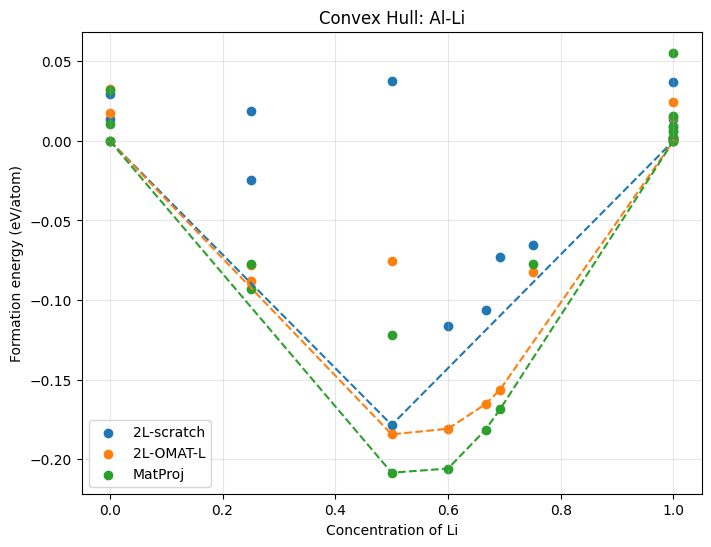

In [20]:
plot_convex_hull({"2L-scratch":df, "2L-OMAT-L":df_fm, "MatProj": ref_df})